In [1]:
import os

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

# librosa is a Python library for analyzing audio and music.
# It can be used to extract the data from the audio files
import librosa 
import librosa.display
import audioread
# to play the audio files
from IPython.display import Audio
plt.style.use('seaborn-white')
import soundfile

from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

import sys

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report

import keras
from keras.callbacks import ReduceLROnPlateau
from keras.models import Sequential
from keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, Dropout, BatchNormalization
from keras.utils import np_utils, to_categorical
from keras.callbacks import ModelCheckpoint

import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning) 

In [2]:
TESS = "/Users/kokilareddy/Downloads/download/TESS Toronto emotional speech set data/"
RAV = "/Users/kokilareddy/Downloads/download/audio_speech_actors_01-24/"
SAVEE = "/Users/kokilareddy/Downloads/download/AudioData/"
CREMA = "/Users/kokilareddy/Downloads/download/AudioWAV/"

In [3]:
# Get the data location for SAVEE
dir_list = os.listdir(SAVEE)

# parse the filename to get the emotions
emotion=[]
path = []
for i in dir_list:
    if i[-8:-6]=='_a':
        emotion.append('angry')
    elif i[-8:-6]=='_d':
        emotion.append('disgust')
    elif i[-8:-6]=='_f':
        emotion.append('fear')
    elif i[-8:-6]=='_h':
        emotion.append('happy')
    elif i[-8:-6]=='_n':
        emotion.append('neutral')
    elif i[-8:-6]=='sa':
        emotion.append('sad')
    elif i[-8:-6]=='su':
        emotion.append('surprise')
    else:
        emotion.append('unknown') 
    path.append(SAVEE + i)

# Now check out the label count distribution 
SAVEE_df = pd.DataFrame(emotion, columns = ['Emotion'])
SAVEE_df = pd.concat([SAVEE_df, pd.DataFrame(path, columns = ['Path'])], axis = 1)
print('SAVEE dataset')
SAVEE_df.head()

SAVEE dataset


,Emotion,Path
0,sad,/Users/kokilareddy/Downloads/download/AudioDat...
1,sad,/Users/kokilareddy/Downloads/download/AudioDat...
2,neutral,/Users/kokilareddy/Downloads/download/AudioDat...
3,surprise,/Users/kokilareddy/Downloads/download/AudioDat...
4,neutral,/Users/kokilareddy/Downloads/download/AudioDat...


In [4]:
# Get the data location for TESS
path = []
emotion = []
dir_list = os.listdir(TESS)

for i in dir_list:
    fname = os.listdir(TESS + i)   
    for f in fname:
        if i == 'OAF_angry' or i == 'YAF_angry':
            emotion.append('angry')
        elif i == 'OAF_disgust' or i == 'YAF_disgust':
            emotion.append('disgust')
        elif i == 'OAF_Fear' or i == 'YAF_fear':
            emotion.append('fear')
        elif i == 'OAF_happy' or i == 'YAF_happy':
            emotion.append('happy')
        elif i == 'OAF_neutral' or i == 'YAF_neutral':
            emotion.append('neutral')                                
        elif i == 'OAF_Pleasant_surprise' or i == 'YAF_pleasant_surprised':
            emotion.append('surprise')               
        elif i == 'OAF_Sad' or i == 'YAF_sad':
            emotion.append('sad')
        else:
            emotion.append('Unknown')
        path.append(TESS + i + "/" + f)

TESS_df = pd.DataFrame(emotion, columns = ['Emotion'])
#TESS_df['source'] = 'TESS'
TESS_df = pd.concat([TESS_df,pd.DataFrame(path, columns = ['Path'])],axis=1)
print('TESS dataset')
TESS_df.head()

TESS dataset


,Emotion,Path
0,disgust,/Users/kokilareddy/Downloads/download/TESS Tor...
1,disgust,/Users/kokilareddy/Downloads/download/TESS Tor...
2,disgust,/Users/kokilareddy/Downloads/download/TESS Tor...
3,disgust,/Users/kokilareddy/Downloads/download/TESS Tor...
4,disgust,/Users/kokilareddy/Downloads/download/TESS Tor...


In [5]:
dir = os.listdir(RAV)

males = []
females = [] 
        
for actor in dir:
       
    files = os.listdir(RAV + actor)
        
    for file in files: 
        part = file.split('.')[0]
        part = part.split("-")           
            
        temp = int(part[6])        
                
        if part[2] == '01':
            emotion = 'neutral'
        elif part[2] == '02':
            emotion = 'calm'
        elif part[2] == '03':
            emotion = 'happy'
        elif part[2] == '04':
            emotion = 'sad'
        elif part[2] == '05':
            emotion = 'angry'
        elif part[2] == '06':
            emotion = 'fear'
        elif part[2] == '07':
            emotion = 'disgust'
        elif part[2] == '08':
            emotion = 'surprise'
        else:
            emotion = 'unknown'
            
        if temp%2 == 0:
            path = (RAV + actor + '/' + file)
            #emotion = 'female_'+emotion
            females.append([emotion, path]) 
        else:
            path = (RAV + actor + '/' + file)
             #emotion = 'male_'+emotion
            males.append([emotion, path])   
    
   
RavFemales_df = pd.DataFrame(females)
RavFemales_df.columns = ['Emotion', 'Path']

RavMales_df = pd.DataFrame(males)
RavMales_df.columns = ['Emotion', 'Path']

print('RAVDESS datasets')
RavFemales_df.head()


RAVDESS datasets


,Emotion,Path
0,angry,/Users/kokilareddy/Downloads/download/audio_sp...
1,fear,/Users/kokilareddy/Downloads/download/audio_sp...
2,fear,/Users/kokilareddy/Downloads/download/audio_sp...
3,angry,/Users/kokilareddy/Downloads/download/audio_sp...
4,disgust,/Users/kokilareddy/Downloads/download/audio_sp...


In [6]:
files = os.listdir(CREMA)

female = [1002,1003,1004,1006,1007,1008,1009,1010,1012,1013,1018,1020,1021,1024,1025,1028,1029,1030,1037,1043,1046,1047,1049,
          1052,1053,1054,1055,1056,1058,1060,1061,1063,1072,1073,1074,1075,1076,1078,1079,1082,1084,1089,1091]
males = []
females = []

for file in files: 
    part = file.split('_')   
    
    if part[2] == 'SAD':
        emotion = 'sad'
    elif part[2] == 'ANG':
        emotion = 'angry'
    elif part[2] == 'DIS':
        emotion = 'disgust'
    elif part[2] == 'FEA':
        emotion = 'fear'
    elif part[2] == 'HAP':
        emotion = 'happy'
    elif part[2] == 'NEU':
        emotion = 'neutral'  
    else:
        emotion = 'unknown'
        
    if int(part[0]) in female:
        path = (CREMA + '/' + file)
        #emotion = 'female_'+emotion
        females.append([emotion, path]) 
    else:
        path = (CREMA + '/' + file)
        #emotion = 'male_'+emotion
        males.append([emotion, path])   
    
CremaFemales_df = pd.DataFrame(females)
CremaFemales_df.columns = ['Emotion', 'Path']

CremaMales_df = pd.DataFrame(males)
CremaMales_df.columns = ['Emotion', 'Path']
    
print('CREMA datasets')
CremaFemales_df.head()

CREMA datasets


,Emotion,Path
0,angry,/Users/kokilareddy/Downloads/download/AudioWAV...
1,neutral,/Users/kokilareddy/Downloads/download/AudioWAV...
2,neutral,/Users/kokilareddy/Downloads/download/AudioWAV...
3,disgust,/Users/kokilareddy/Downloads/download/AudioWAV...
4,sad,/Users/kokilareddy/Downloads/download/AudioWAV...


In [7]:
CremaFemales_df['Gender'] = 'Female'

In [8]:
CremaMales_df['Gender'] = 'Male'

In [9]:
TESS_df['Gender']='Female'
RavFemales_df['Gender']='Female'
RavMales_df['Gender']='Male'
SAVEE_df['Gender']='Male'

In [10]:
Audiodata=CremaFemales_df.append(CremaMales_df, ignore_index=True).append(TESS_df, ignore_index=True).append(RavFemales_df, ignore_index=True).append(RavMales_df, ignore_index=True).append(SAVEE_df, ignore_index=True)

In [11]:
Audiodata

,Emotion,Path,Gender
0,angry,/Users/kokilareddy/Downloads/download/AudioWAV...,Female
1,neutral,/Users/kokilareddy/Downloads/download/AudioWAV...,Female
2,neutral,/Users/kokilareddy/Downloads/download/AudioWAV...,Female
3,disgust,/Users/kokilareddy/Downloads/download/AudioWAV...,Female
4,sad,/Users/kokilareddy/Downloads/download/AudioWAV...,Female
...,...,...,...
12157,angry,/Users/kokilareddy/Downloads/download/AudioDat...,Male
12158,angry,/Users/kokilareddy/Downloads/download/AudioDat...,Male
12159,neutral,/Users/kokilareddy/Downloads/download/AudioDat...,Male
12160,surprise,/Users/kokilareddy/Downloads/download/AudioDat...,Male


In [12]:
Audiodata.Emotion.unique() 

array(['angry', 'neutral', 'disgust', 'sad', 'fear', 'happy', 'surprise',
       'calm'], dtype=object)

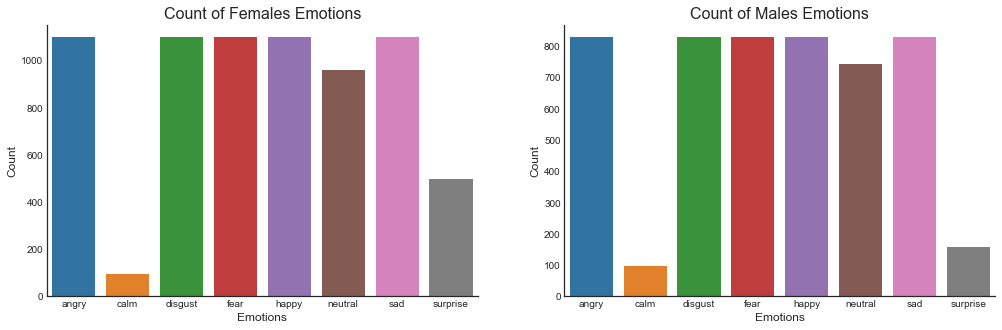

In [13]:
Males = pd.concat([SAVEE_df, RavMales_df, CremaMales_df], axis = 0)
Males.to_csv("males_emotions_df.csv", index = False)

Females = pd.concat([TESS_df, RavFemales_df, CremaFemales_df], axis = 0)
Females.to_csv("females_emotions_df.csv", index = False)

order = ['angry','calm','disgust','fear','happy','neutral','sad','surprise']

fig = plt.figure(figsize=(17, 5))

fig.add_subplot(121)
plt.title('Count of Females Emotions', size=16)
sns.countplot(Females.Emotion, order = order)
plt.ylabel('Count', size=12)
plt.xlabel('Emotions', size=12)
sns.despine(top=True, right=True, left=False, bottom=False)

fig.add_subplot(122)
plt.title('Count of Males Emotions', size=16)
sns.countplot(Males.Emotion, order = order)
plt.ylabel('Count', size=12)
plt.xlabel('Emotions', size=12)
sns.despine(top=True, right=True, left=False, bottom=False)

plt.show()

In [14]:
Audiodata['Paths']=Audiodata['Path']+"@"+Audiodata['Emotion']
Paths=Audiodata['Paths']

In [15]:
# CNN1D

In [16]:
#if in need of more data go for data augmentation

def noise(data):
    noise_amp = 0.04*np.random.uniform()*np.amax(data)
    data = data + noise_amp*np.random.normal(size=data.shape[0])
    return data

def stretch(data, rate=0.70):
    return librosa.effects.time_stretch(data, rate)

def shift(data):
    shift_range = int(np.random.uniform(low=-5, high = 5)*1000)
    return np.roll(data, shift_range)

def pitch(data, sampling_rate, pitch_factor=0.8):
    return librosa.effects.pitch_shift(data, sampling_rate, pitch_factor)

def higher_speed(data, speed_factor = 1.25):
    return librosa.effects.time_stretch(data, speed_factor)

def lower_speed(data, speed_factor = 0.75):
    return librosa.effects.time_stretch(data, speed_factor)

In [18]:
def extract_features(data, sample_rate):
    # ZCR
    result = np.array([])
    zcr = np.mean(librosa.feature.zero_crossing_rate(y=data).T, axis=0)
    result=np.hstack((result, zcr)) # stacking horizontally

    # Chroma_stft
    stft = np.abs(librosa.stft(data))
    chroma_stft = np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T, axis=0)
    result = np.hstack((result, chroma_stft)) # stacking horizontally

    # MFCC
    mfcc = np.mean(librosa.feature.mfcc(y=data, sr=sample_rate).T, axis=0)
    result = np.hstack((result, mfcc)) # stacking horizontally

    # Root Mean Square Value
    rms = np.mean(librosa.feature.rms(y=data).T, axis=0)
    result = np.hstack((result, rms)) # stacking horizontally

    # MelSpectogram
    mel = np.mean(librosa.feature.melspectrogram(y=data, sr=sample_rate).T, axis=0)
    result = np.hstack((result, mel)) # stacking horizontally
    
    return result

def get_features(path):
    # duration and offset are used to take care of the no audio in start and the ending of each audio files as seen above.
    data, sample_rate = librosa.load(path, duration=2.5, offset=0.6)
    
    # without augmentation
    res1 = extract_features(data, sample_rate)
    result = np.array(res1)
    
    return result


In [19]:
X, Y = [], []
for path, emo in zip(Audiodata.Path, Audiodata.Emotion):
    feature = get_features(path)
    X.append(feature)
    Y.append(emo)
    print(emo)

angry
neutral
neutral
disgust
sad
fear
happy
fear
sad
angry
disgust
neutral
fear
neutral
disgust
disgust
fear
fear
neutral
angry
neutral
neutral
disgust
sad
sad
happy
happy
sad
disgust
disgust
neutral
angry
angry
sad
sad
neutral
disgust
happy
happy
disgust
sad
sad
neutral
fear
angry
disgust
happy
sad
fear
fear
fear
angry
angry
disgust
neutral
happy
fear
angry
disgust
disgust
happy
disgust
disgust
neutral
disgust
sad
disgust
disgust
sad
disgust
happy
neutral
disgust
disgust
angry
angry
happy
happy
neutral
happy
disgust
disgust
fear
neutral
angry
disgust
disgust
sad
neutral
disgust
disgust
disgust
disgust
disgust
disgust
angry
disgust
sad
fear
fear
happy
disgust
disgust
disgust
neutral
disgust
sad
fear
neutral
angry
angry
neutral
fear
happy
angry
sad
fear
neutral
fear
sad
happy
disgust
fear
angry
angry
fear
happy
fear
fear
fear
sad
sad
happy
fear
fear
angry
neutral
neutral
angry
angry
happy
fear
angry
angry
angry
angry
sad
fear
fear
happy
fear
fear
happy
fear
fear
sad
fear
fear
happy
hap

angry
angry
happy
happy
fear
angry
neutral
sad
sad
angry
disgust
disgust
sad
happy
fear
happy
disgust
happy
disgust
happy
fear
happy
fear
happy
happy
angry
angry
neutral
sad
sad
happy
fear
fear
sad
happy
disgust
disgust
disgust
sad
neutral
neutral
fear
fear
happy
disgust
sad
disgust
neutral
neutral
angry
sad
sad
disgust
fear
neutral
happy
happy
sad
sad
sad
neutral
fear
neutral
angry
sad
disgust
sad
disgust
neutral
neutral
happy
sad
sad
angry
disgust
neutral
neutral
sad
sad
happy
happy
happy
fear
neutral
happy
fear
happy
sad
sad
happy
sad
sad
fear
sad
happy
sad
sad
angry
angry
angry
angry
neutral
neutral
disgust
angry
angry
neutral
fear
fear
fear
neutral
disgust
angry
angry
sad
disgust
disgust
disgust
disgust
fear
neutral
disgust
fear
sad
sad
happy
happy
neutral
angry
angry
angry
angry
happy
neutral
disgust
disgust
angry
fear
fear
sad
happy
happy
fear
sad
happy
fear
sad
neutral
sad
happy
happy
sad
sad
happy
fear
fear
angry
neutral
angry
angry
happy
disgust
angry
disgust
happy
fear
disgu

sad
angry
angry
happy
fear
neutral
neutral
fear
neutral
fear
sad
angry
neutral
neutral
happy
fear
fear
sad
fear
fear
happy
angry
angry
sad
disgust
fear
angry
angry
angry
angry
fear
neutral
angry
angry
angry
neutral
fear
fear
sad
happy
fear
happy
sad
sad
happy
happy
fear
fear
happy
sad
fear
fear
happy
sad
angry
angry
angry
fear
fear
angry
happy
sad
sad
fear
fear
happy
disgust
disgust
disgust
angry
neutral
disgust
disgust
sad
disgust
fear
sad
happy
disgust
disgust
angry
neutral
happy
disgust
sad
disgust
disgust
sad
disgust
disgust
angry
disgust
happy
happy
neutral
angry
disgust
disgust
disgust
disgust
happy
neutral
neutral
angry
disgust
disgust
sad
sad
fear
fear
neutral
neutral
neutral
neutral
fear
disgust
sad
sad
fear
fear
sad
angry
disgust
neutral
neutral
sad
sad
disgust
happy
sad
sad
angry
angry
disgust
disgust
neutral
disgust
disgust
angry
angry
disgust
angry
angry
fear
disgust
sad
sad
sad
fear
fear
neutral
neutral
disgust
angry
sad
sad
sad
sad
angry
angry
happy
disgust
sad
fear
fear

angry
happy
neutral
sad
sad
sad
disgust
angry
angry
fear
happy
neutral
neutral
fear
fear
happy
angry
angry
angry
angry
neutral
angry
angry
neutral
neutral
sad
fear
sad
fear
happy
disgust
angry
happy
happy
fear
fear
neutral
happy
happy
fear
sad
sad
disgust
sad
happy
neutral
neutral
sad
happy
angry
neutral
neutral
disgust
happy
neutral
angry
neutral
sad
sad
angry
fear
fear
happy
happy
fear
angry
neutral
neutral
sad
angry
angry
happy
disgust
disgust
happy
disgust
disgust
sad
disgust
disgust
sad
neutral
neutral
fear
angry
happy
sad
neutral
angry
angry
angry
neutral
neutral
angry
angry
angry
neutral
sad
fear
fear
sad
happy
sad
fear
disgust
happy
disgust
happy
disgust
fear
happy
sad
fear
angry
fear
sad
happy
happy
neutral
fear
angry
sad
sad
sad
angry
angry
happy
happy
sad
disgust
sad
disgust
disgust
sad
fear
fear
disgust
happy
neutral
happy
happy
fear
fear
sad
sad
neutral
fear
fear
angry
angry
disgust
disgust
disgust
happy
happy
disgust
disgust
disgust
fear
fear
fear
sad
angry
angry
disgust


sad
happy
happy
disgust
neutral
disgust
happy
happy
angry
disgust
sad
sad
neutral
neutral
sad
happy
fear
happy
sad
sad
neutral
angry
happy
happy
neutral
happy
happy
disgust
fear
fear
angry
disgust
neutral
angry
angry
angry
neutral
angry
sad
neutral
neutral
happy
angry
fear
sad
sad
fear
fear
happy
fear
sad
happy
angry
happy
happy
happy
sad
sad
sad
fear
angry
fear
disgust
neutral
sad
angry
neutral
happy
happy
neutral
angry
happy
happy
sad
disgust
sad
sad
happy
fear
fear
neutral
neutral
angry
angry
happy
sad
fear
happy
fear
happy
disgust
sad
disgust
disgust
angry
fear
fear
sad
fear
disgust
happy
angry
neutral
neutral
disgust
angry
neutral
disgust
angry
angry
disgust
disgust
happy
fear
happy
happy
sad
angry
fear
sad
fear
angry
angry
happy
disgust
sad
neutral
fear
neutral
happy
neutral
angry
disgust
angry
angry
angry
neutral
disgust
disgust
angry
disgust
disgust
disgust
sad
neutral
angry
angry
happy
fear
disgust
disgust
fear
sad
neutral
fear
happy
neutral
fear
neutral
fear
disgust
disgust
a

happy
fear
disgust
angry
disgust
fear
neutral
neutral
neutral
neutral
angry
disgust
happy
fear
sad
disgust
disgust
angry
angry
happy
neutral
neutral
sad
fear
happy
happy
fear
sad
neutral
sad
fear
angry
happy
happy
fear
neutral
neutral
angry
angry
sad
angry
disgust
happy
sad
fear
sad
happy
fear
fear
happy
sad
happy
sad
sad
fear
fear
sad
happy
neutral
angry
angry
disgust
angry
neutral
neutral
angry
angry
disgust
happy
sad
sad
happy
happy
fear
angry
angry
neutral
sad
fear
fear
happy
happy
angry
sad
sad
neutral
neutral
fear
disgust
disgust
happy
angry
fear
angry
disgust
angry
angry
angry
angry
fear
disgust
sad
sad
happy
sad
happy
fear
happy
fear
sad
sad
fear
happy
fear
happy
happy
fear
disgust
neutral
neutral
angry
angry
angry
angry
angry
angry
angry
fear
disgust
fear
fear
angry
angry
neutral
neutral
disgust
disgust
happy
happy
fear
fear
happy
angry
angry
neutral
sad
sad
neutral
neutral
angry
disgust
happy
happy
neutral
neutral
angry
sad
disgust
sad
happy
happy
angry
fear
disgust
angry
fea

happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
sad
sad
sad
sad
sad
sad
sad
sad
sa

surprise
surprise
surprise
surprise
surprise
surprise
surprise
surprise
surprise
surprise
surprise
surprise
surprise
surprise
surprise
surprise
surprise
surprise
surprise
surprise
surprise
surprise
surprise
surprise
surprise
surprise
surprise
surprise
surprise
surprise
surprise
surprise
surprise
surprise
surprise
surprise
surprise
surprise
surprise
surprise
fear
fear
fear
fear
fear
fear
fear
fear
fear
fear
fear
fear
fear
fear
fear
fear
fear
fear
fear
fear
fear
fear
fear
fear
fear
fear
fear
fear
fear
fear
fear
fear
fear
fear
fear
fear
fear
fear
fear
fear
fear
fear
fear
fear
fear
fear
fear
fear
fear
fear
fear
fear
fear
fear
fear
fear
fear
fear
fear
fear
fear
fear
fear
fear
fear
fear
fear
fear
fear
fear
fear
fear
fear
fear
fear
fear
fear
fear
fear
fear
fear
fear
fear
fear
fear
fear
fear
fear
fear
fear
fear
fear
fear
fear
fear
fear
fear
fear
fear
fear
fear
fear
fear
fear
fear
fear
fear
fear
fear
fear
fear
fear
fear
fear
fear
fear
fear
fear
fear
fear
fear
fear
fear
fear
fear
fear
fear
fear


sad
surprise
surprise
happy
happy
calm
calm
neutral
disgust
sad
sad
disgust
angry
fear
fear
angry
surprise
surprise
calm
neutral
calm
happy
happy
neutral
calm
calm
happy
happy
sad
disgust
disgust
sad
fear
angry
angry
fear
surprise
surprise
fear
angry
angry
fear
sad
disgust
disgust
sad
surprise
surprise
happy
happy
calm
calm
neutral
happy
happy
calm
neutral
calm
angry
fear
fear
angry
disgust
sad
sad
disgust
surprise
surprise
neutral
calm
calm
happy
happy
sad
disgust
disgust
sad
fear
angry
angry
fear
surprise
surprise
disgust
sad
sad
disgust
angry
fear
fear
angry
surprise
surprise
calm
neutral
calm
happy
happy
calm
neutral
calm
happy
happy
surprise
surprise
disgust
sad
sad
disgust
angry
fear
fear
angry
surprise
surprise
sad
disgust
disgust
sad
fear
angry
angry
fear
neutral
calm
calm
happy
happy
surprise
surprise
angry
fear
fear
angry
disgust
sad
sad
disgust
happy
happy
calm
neutral
calm
happy
happy
calm
calm
neutral
surprise
surprise
fear
angry
angry
fear
sad
disgust
disgust
sad
happy
ha

neutral
angry
angry
neutral
neutral
fear
happy
happy
surprise
surprise
neutral
neutral
neutral
surprise
surprise
neutral
disgust
happy
surprise
happy
neutral
neutral
angry
angry
sad
sad
happy
angry
happy
fear
fear
happy
happy
angry
sad
sad
angry
angry
neutral
neutral
surprise
happy
happy
disgust
neutral
surprise
surprise
neutral
neutral
surprise
neutral
neutral
happy
angry
neutral
neutral
sad
happy
happy
sad
neutral
neutral
angry
happy
happy
neutral
neutral
surprise
surprise
surprise
neutral
neutral
happy
angry
angry
neutral
surprise
neutral
sad
happy
happy
happy
sad
sad
surprise
neutral
neutral
angry
happy
neutral
neutral
surprise
neutral
disgust
surprise
fear
neutral
surprise
neutral
surprise
disgust
disgust
angry
fear
fear
angry
disgust
neutral
surprise
surprise
neutral
fear
fear
surprise
disgust
neutral
neutral
neutral
disgust
disgust
surprise
surprise
fear
neutral
surprise
surprise
disgust
angry
angry
fear
fear
fear
angry
disgust
surprise
surprise
neutral
fear
surprise
disgust
neu

In [20]:
len(X), len(Y), Audiodata.Path.shape

(12162, 12162, (12162,))

In [21]:
Features = pd.DataFrame(X)
Features['labels'] = Y
Features.to_csv('features.csv', index=False)
Features.head()
# Features=pd.read_csv('features.csv')

,0,1,2,3,4,5,6,7,8,9,...,153,154,155,156,157,158,159,160,161,labels
0,0.097346,0.592933,0.503150,0.504115,0.568304,0.524867,0.473888,0.554124,0.548831,0.503012,...,6.301072e-08,5.613409e-08,5.090190e-08,4.680120e-08,4.359725e-08,4.115186e-08,3.931179e-08,3.804773e-08,3.727246e-08,angry
1,0.063477,0.543312,0.512528,0.516724,0.535872,0.607934,0.643923,0.712095,0.721970,0.688531,...,1.068985e-09,8.491863e-10,7.033308e-10,6.015753e-10,5.293448e-10,4.779300e-10,4.415431e-10,4.172852e-10,4.030534e-10,neutral
2,0.067139,0.623033,0.645267,0.585493,0.585945,0.650043,0.653311,0.672032,0.682936,0.653652,...,1.127831e-07,1.044189e-07,9.774222e-08,9.224811e-08,8.778154e-08,8.428140e-08,8.157357e-08,7.968844e-08,7.850854e-08,neutral
3,0.044110,0.589039,0.611191,0.593585,0.596590,0.606382,0.604752,0.670094,0.681396,0.596490,...,5.163940e-09,4.806489e-09,4.509733e-09,4.259678e-09,4.053425e-09,3.890260e-09,3.763321e-09,3.674651e-09,3.619073e-09,disgust
4,0.044360,0.509832,0.582253,0.551462,0.484450,0.484031,0.494804,0.451936,0.511989,0.630562,...,6.174565e-07,5.713655e-07,5.345408e-07,5.042075e-07,4.795477e-07,4.602215e-07,4.452674e-07,4.348527e-07,4.283351e-07,sad


In [22]:
X = Features.iloc[: ,:-1].values
Y = Features['labels'].values

In [23]:
encoder = OneHotEncoder()
Y = encoder.fit_transform(np.array(Y).reshape(-1,1)).toarray()

In [24]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, random_state=0, shuffle=True)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((9121, 162), (9121, 8), (3041, 162), (3041, 8))

In [25]:
# scaling our data with sklearn's Standard scaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((9121, 162), (9121, 8), (3041, 162), (3041, 8))

In [26]:
# making our data compatible to model.
x_train = np.expand_dims(x_train, axis=2)
x_test = np.expand_dims(x_test, axis=2)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((9121, 162, 1), (9121, 8), (3041, 162, 1), (3041, 8))

In [27]:
model=Sequential()
model.add(Conv1D(256, kernel_size=5, strides=1, padding='same', activation='relu', input_shape=(x_train.shape[1], 1)))
model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))

model.add(Conv1D(256, kernel_size=5, strides=1, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))

model.add(Conv1D(128, kernel_size=5, strides=1, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))
model.add(Dropout(0.2))

model.add(Conv1D(64, kernel_size=5, strides=1, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))

model.add(Flatten())
model.add(Dense(units=32, activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(units=8, activation='softmax'))
model.compile(optimizer = 'adam' , loss = 'categorical_crossentropy' , metrics = ['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 162, 256)          1536      
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 81, 256)           0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 81, 256)           327936    
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 41, 256)           0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 41, 128)           163968    
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 21, 128)           0         
_________________________________________________________________
dropout (Dropout)            (None, 21, 128)           0

In [28]:
rlrp = ReduceLROnPlateau(monitor='loss', factor=0.4, verbose=0, patience=2, min_lr=0.0000001)
history=model.fit(x_train, y_train, batch_size=128, epochs=100, validation_data=(x_test, y_test), callbacks=[rlrp])

Epoch 1/100
72/72 [==============================] - 101s 1s/step - loss: 1.8725 - accuracy: 0.2552 - val_loss: 1.6713 - val_accuracy: 0.3479
Epoch 2/100
72/72 [==============================] - 98s 1s/step - loss: 1.6575 - accuracy: 0.3291 - val_loss: 1.5097 - val_accuracy: 0.4055
Epoch 3/100
72/72 [==============================] - 100s 1s/step - loss: 1.5408 - accuracy: 0.3751 - val_loss: 1.4381 - val_accuracy: 0.4134
Epoch 4/100
72/72 [==============================] - 102s 1s/step - loss: 1.4690 - accuracy: 0.4108 - val_loss: 1.3508 - val_accuracy: 0.4788
Epoch 5/100
72/72 [==============================] - 105s 1s/step - loss: 1.3916 - accuracy: 0.4452 - val_loss: 1.3054 - val_accuracy: 0.4880
Epoch 6/100
72/72 [==============================] - 115s 2s/step - loss: 1.3707 - accuracy: 0.4527 - val_loss: 1.2727 - val_accuracy: 0.4890
Epoch 7/100
72/72 [==============================] - 105s 1s/step - loss: 1.3189 - accuracy: 0.4715 - val_loss: 1.2548 - val_accuracy: 0.4969
Epoch 8

72/72 [==============================] - 183s 3s/step - loss: 0.5911 - accuracy: 0.7747 - val_loss: 1.3353 - val_accuracy: 0.5876
Epoch 59/100
72/72 [==============================] - 145s 2s/step - loss: 0.5801 - accuracy: 0.7802 - val_loss: 1.4305 - val_accuracy: 0.5843
Epoch 60/100
72/72 [==============================] - 153s 2s/step - loss: 0.5806 - accuracy: 0.7783 - val_loss: 1.4143 - val_accuracy: 0.5906
Epoch 61/100
72/72 [==============================] - 152s 2s/step - loss: 0.5487 - accuracy: 0.7953 - val_loss: 1.3888 - val_accuracy: 0.5850
Epoch 62/100
72/72 [==============================] - 151s 2s/step - loss: 0.5616 - accuracy: 0.7895 - val_loss: 1.3661 - val_accuracy: 0.5890
Epoch 63/100
72/72 [==============================] - 152s 2s/step - loss: 0.5316 - accuracy: 0.7959 - val_loss: 1.4465 - val_accuracy: 0.5705
Epoch 64/100
72/72 [==============================] - 171s 2s/step - loss: 0.5243 - accuracy: 0.7984 - val_loss: 1.4267 - val_accuracy: 0.5768
Epoch 65/100

In [29]:
from keras.models import load_model
model.save('CNNLSTM.h5')

In [53]:
path="/Users/kokilareddy/Downloads/download/AudioWAV/1035_ITS_FEA_XX.wav"
x=[]
feature = get_features(path)
x.append(feature)
x = np.expand_dims(x, axis=2)
x = np.expand_dims(x, axis=2)
pred_test = model.predict(x)
y_preds = encoder.inverse_transform(pred_test)
y_preds

array([['fear']], dtype=object)

In [34]:
#  predicting on test data.
pred_test = model.predict(x_test)
y_pred = encoder.inverse_transform(pred_test)
y_testm = encoder.inverse_transform(y_test)

accuracy=accuracy_score(y_testm, y_pred )
# - Print the accuracy
print("Accuracy: {:.2f}%".format(accuracy*100))

Accuracy: 59.03%


In [51]:
import sounddevice as sd
import numpy as np
from scipy.io.wavfile import write 
# import wavio as wv
import scipy.io.wavfile as wav

fs=44100
duration = 5  # seconds
myrecording = sd.rec(duration * fs, samplerate=fs, channels=2,dtype='float64')
print("Recording Audio")
sd.wait()
print("Audio recording complete ,checking emotion")
write("recording0.wav", fs, myrecording)
path="recording0.wav"
x=[]
feature = get_features(path)
x.append(feature)
x = np.expand_dims(x, axis=2)
pred_test = model.predict(x)
y_preds = encoder.inverse_transform(pred_test)
y_preds

Recording Audio
Audio recording complete ,checking emotion


array([['happy']], dtype=object)